# Exploring Traffic Data

The first thing to do is to check the features of the traffic dataset.

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import datetime as dt 
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline

## Download json file

`request` json file with an API.
Download cameras, active segments.

In [2]:
from pandas.io.json import json_normalize
# camera data
cameras = requests.get("https://telraam-api.net/v0/cameras")
nbr_cameras = len(cameras.json()['cameras'][:])
print('Nbr of cameras:',nbr_cameras)
data_cameras = json_normalize(cameras.json()['cameras'])
print(list(data_cameras.columns))
print(data_cameras.head(20))
# check unique segments
data_cameras['segment_id'] = data_cameras['segment_id'].astype(np.uint64)
uniqueSegments = data_cameras['segment_id'].unique()
uniqueSegments.sort()
print(uniqueSegments[-10:-1])

Nbr of cameras: 972
['bikes_left', 'bikes_right', 'cars_left', 'cars_right', 'direction', 'last_data_package', 'mac', 'manual', 'pedestrians_left', 'pedestrians_right', 'segment_id', 'status', 'time_added', 'user_id']
    bikes_left  bikes_right  cars_left  cars_right  direction  \
0         True         True       True        True      False   
1         True         True       True        True       True   
2         True         True       True        True       True   
3         True         True       True        True       True   
4         True         True       True        True       True   
5         True         True       True        True       True   
6         True         True       True        True      False   
7         True         True       True        True       True   
8         True         True       True        True      False   
9         True         True       True        True       True   
10        True         True       True        True      False   
11

In [3]:
# segments data
segments = requests.get("https://telraam-api.net/v0/segments/active")
nbr_segments = len(segments.json()['features'][:])
print('Nbr of segments:',nbr_segments)
data_segments = json_normalize(segments.json()['features'])
print(list(data_segments.columns))
print(data_segments.head(10))
print(data_segments['properties.typical_data'][1])
# sort segment data wrt IDs
data_segments = data_segments.sort_values(['properties.id'], ascending=[True])
activeSegmentIDs = data_segments['properties.id'].values
uniqueActiveSegmentsIDs = data_segments['properties.id'].unique()
print('Number of active segments:'+str(len(activeSegmentIDs)))
print('Number of unique active segments:'+str(len(uniqueActiveSegmentsIDs)))

Nbr of segments: 819
['geometry.coordinates', 'geometry.type', 'properties.bike', 'properties.bike_avg', 'properties.car', 'properties.car_avg', 'properties.car_speed_buckets', 'properties.car_speed_histogram', 'properties.id', 'properties.last_data_package', 'properties.lorry', 'properties.lorry_avg', 'properties.oneway', 'properties.pedestrian', 'properties.pedestrian_avg', 'properties.road_speed', 'properties.road_type', 'properties.speed', 'properties.typical_data', 'type']
                                geometry.coordinates    geometry.type  \
0  [[[5.223011001986623, 51.07664998673491], [5.2...  MultiLineString   
1  [[[4.672590795962118, 52.11733000219071], [4.6...  MultiLineString   
2  [[[4.844638195731497, 50.327054302724086], [4....  MultiLineString   
3  [[[3.9993072959552927, 50.45575610258816], [3....  MultiLineString   
4  [[[4.062417032325852, 51.007061330563126], [4....  MultiLineString   
5  [[[4.361537605029282, 51.16053641877471], [4.3...  MultiLineString   
6  [[[

## Clean inactive segment from camera datasets

It shows that there are only 764 unique segments in the data. The duplicate segments might vary in terms of direction. It is still a question to be answered.

In [4]:
inactiveSegmentIDs = list(set(uniqueSegments) ^ set(activeSegmentIDs))
print('Inactive segments = '+ str(len(inactiveSegmentIDs)))
commonSegmentIDs = set(uniqueSegments).intersection(activeSegmentIDs)
print('Common segments = ' + str(len(commonSegmentIDs)))
print('If active == unique segments:')
if len(inactiveSegmentIDs)+len(activeSegmentIDs) == len(uniqueSegments):
    print('\t' + str(True))
else:
    print('\t' + str(False))

Inactive segments = 83
Common segments = 767
If active == unique segments:
	False


## Timestamps

Date and hour registration. To check if they need sorting again.

In [5]:
# Camera data timestamps
dateveri = data_cameras['time_added'].values
hours = pd.to_datetime(np.squeeze(dateveri)).hour
dates = pd.to_datetime(np.squeeze(dateveri)).date
# camera data needs sorting again
data_cameras = data_cameras.sort_values(['status','segment_id','time_added'], ascending=[True, True, True])
print(data_cameras.head(10))


     bikes_left  bikes_right  cars_left  cars_right  direction  \
18         True         True       True        True       True   
44         True         True       True        True      False   
553        True         True       True        True      False   
550        True         True       True        True      False   
785        True         True       True        True      False   
880        True         True       True        True       True   
627        True         True       True        True      False   
818        True         True       True        True       True   
8          True         True       True        True      False   
875        True         True       True        True      False   

            last_data_package              mac  manual  pedestrians_left  \
18   2020-02-19T18:15:32.010Z  202481588641665   False              True   
44   2020-02-19T18:15:32.010Z  202481588641665   False              True   
553  2020-02-19T18:15:28.819Z  20248158781019

In [6]:
# Segment data timestamps
dateveri = data_segments['properties.typical_data'].values
print(dateveri[0])

# hours = pd.to_datetime(np.squeeze(dateveri)).hour
# dates = pd.to_datetime(np.squeeze(dateveri)).date
# camera data needs sorting again

[{'hour': '05:00:00', 'pedestrian': None, 'bike': None, 'car': None, 'lorry': None}, {'hour': '06:00:00', 'pedestrian': None, 'bike': None, 'car': None, 'lorry': None}, {'hour': '07:00:00', 'pedestrian': None, 'bike': None, 'car': None, 'lorry': None}, {'hour': '08:00:00', 'pedestrian': 0, 'bike': 4, 'car': 105, 'lorry': 0}, {'hour': '09:00:00', 'pedestrian': 1, 'bike': 33, 'car': 141, 'lorry': 2}, {'hour': '10:00:00', 'pedestrian': 1, 'bike': 23, 'car': 202, 'lorry': 6}, {'hour': '11:00:00', 'pedestrian': 1, 'bike': 3, 'car': 180, 'lorry': 6}, {'hour': '12:00:00', 'pedestrian': 1, 'bike': 19, 'car': 192, 'lorry': 4}, {'hour': '13:00:00', 'pedestrian': 1, 'bike': 10, 'car': 203, 'lorry': 5}, {'hour': '14:00:00', 'pedestrian': 0, 'bike': 11, 'car': 211, 'lorry': 4}, {'hour': '15:00:00', 'pedestrian': 0, 'bike': 0, 'car': 141, 'lorry': 0}, {'hour': '16:00:00', 'pedestrian': 2, 'bike': 15, 'car': 330, 'lorry': 0}, {'hour': '17:00:00', 'pedestrian': None, 'bike': None, 'car': None, 'lorry'

## Position of Segments

We only take the middle position of the segments.

In [7]:
segmentCoordinates = np.zeros((len(activeSegmentIDs),2))
# Read coordinates from each segment
for i in range(len(activeSegmentIDs)):
    urlSegment = 'https://telraam-api.net/v0/segments/id/'+str(activeSegmentIDs[i])
    active = requests.get(urlSegment)
    co = np.array(active.json()['features'][0]['geometry']['coordinates'][0]) # coordinates of the cameras
    segmentCoordinates[i,:] = np.mean(co, axis=0)
    
print(segmentCoordinates[0:2,:])

[[ 5.16331069 50.8910606 ]
 [ 5.11286407 50.89409181]]


In [8]:
# Restrict them to Leuven coordinates
activeSegmentIDs = np.expand_dims(np.array(activeSegmentIDs),axis=-1)
segmentCoordinates = np.concatenate((activeSegmentIDs,segmentCoordinates),axis=1)
segmentCoordinates = pd.DataFrame(data=segmentCoordinates, columns=['SegmentID', 'LON', 'LAT'])
print(segmentCoordinates.head(10))

   SegmentID       LON        LAT
0    20499.0  5.163311  50.891061
1    20580.0  5.112864  50.894092
2    24948.0  4.476654  51.302504
3    26137.0  4.487590  51.299626
4    26358.0  3.728146  51.033024
5    26380.0  3.724681  51.032293
6    26408.0  3.706345  51.035715
7    26683.0  3.694862  51.035912
8    26940.0  3.755602  51.045376
9    27009.0  3.758483  51.040428


In [9]:
segmentCoordinates = segmentCoordinates.astype({'SegmentID': 'uint64'})
print(segmentCoordinates.head(10))

   SegmentID       LON        LAT
0      20499  5.163311  50.891061
1      20580  5.112864  50.894092
2      24948  4.476654  51.302504
3      26137  4.487590  51.299626
4      26358  3.728146  51.033024
5      26380  3.724681  51.032293
6      26408  3.706345  51.035715
7      26683  3.694862  51.035912
8      26940  3.755602  51.045376
9      27009  3.758483  51.040428


In [10]:
# Leuven Coordinates
LeuvenCoord = np.array([[4.654269, 4.789127],[50.846792,50.937804]])
LeuvenSegmentCoordinates = segmentCoordinates[segmentCoordinates['LON']>=LeuvenCoord[0,0]]
LeuvenSegmentCoordinates = LeuvenSegmentCoordinates[LeuvenSegmentCoordinates['LON']<=LeuvenCoord[0,1]]
LeuvenSegmentCoordinates = LeuvenSegmentCoordinates[LeuvenSegmentCoordinates['LAT']>=LeuvenCoord[1,0]]
LeuvenSegmentCoordinates = LeuvenSegmentCoordinates[LeuvenSegmentCoordinates['LAT']<=LeuvenCoord[1,1]]
print(LeuvenSegmentCoordinates.shape)

(153, 3)


## Finding most reliable segment

In [11]:
# read segment 1-by-1
LeuvenSegmentIDs = LeuvenSegmentCoordinates['SegmentID'].values
counterSegments = np.zeros_like(LeuvenSegmentIDs)
# url to read a single segment 
url_base = 'https://telraam-api.net/v0/cameras/segment/'
# number of cameras per segment
for  i  in np.arange(0,len(LeuvenSegmentIDs)):
    url = url_base + str(LeuvenSegmentIDs[i])
    telraam_segment = requests.get(url)
    c = int(len(telraam_segment.json()['camera']))
    counterSegments[i] = c

In [12]:
start = 0; stop = 10;
print(counterSegments[start:stop])
# sort them with respect to the number of cameras
countdf = pd.DataFrame(counterSegments,index=LeuvenSegmentIDs,columns=['Nbr'])
countdf.sort_values(by='Nbr',inplace=True,ascending=False)
relSegID = countdf.index[0]

[1 1 1 1 2 2 2 2 1 2]


In [13]:
countdf.head(4)
print(relSegID)
print(LeuvenSegmentCoordinates[LeuvenSegmentCoordinates['SegmentID']==relSegID])

506176
     SegmentID       LON        LAT
675     506176  4.693768  50.884406
676     506176  4.693768  50.884406


##  Traffic info at the most reliable segment

                  car  bike  pedestrian  lorry
2019-03-24 02:00  164   190          38     25
2019-03-25 02:00  465   573          53      3
2019-03-26 02:00  133   225          43      3
2019-03-29 02:00  622   501          58     10


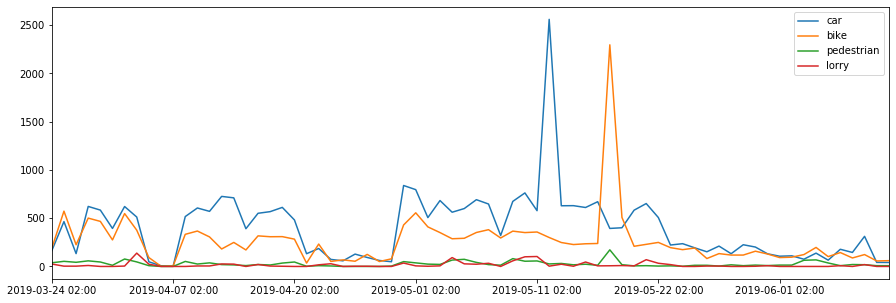

In [14]:
# read segment info from the reports
url = "https://telraam-api.net/v0/reports/" + str(relSegID)
param = "{\n    \"time_start\": \"2019-02-26 00:01\",\n    \"time_end\": \"2019-10-27 23:59\",\n    \"level\": \"segments\",\n    \"format\": \"per-day\"\n}"
headers = {'Content-Type': 'application/json'}
r = requests.request("POST", url, headers=headers,data = param)
# print(r.json())

# vehicle info data frame
dfsegment = pd.DataFrame()
for i in np.arange(0,len((r.json()['report'][:]))):
    info = r.json()['report'][i]
#     df_info = pd.DataFrame({'car':info['car'],'bike':info['bike']},index=[info['date']])
    df_info = pd.DataFrame({'car':info['car'],'bike':info['bike'],'pedestrian':info['pedestrian'],'lorry':info['lorry']},index=[info['date']])
    dfsegment = pd.concat([dfsegment,df_info],axis=0)

print(dfsegment.head(4))
dfsegment.plot(figsize=(15,5));

     SegmentID       LON        LAT
257     244521  4.761599  50.855471
{'segment_id': '244521', 'date': '2019-10-06 02:00', 'pct_up': 0.25, 'pedestrian': 8, 'bike': 256, 'car': 5105, 'lorry': 75, 'pedestrian_lft': 4, 'bike_lft': 201, 'car_lft': 2825, 'lorry_lft': 47, 'pedestrian_rgt': 4, 'bike_rgt': 55, 'car_rgt': 2280, 'lorry_rgt': 28, 'car_speed_histogram': [419, 127, 845, 1579, 667, 403, 344, 726], 'car_speed_bucket': [0, 1, 2, 3, 4, 5, 6, 7]}
{'segment_id': '244521', 'date': '2019-10-07 02:00', 'pct_up': 0.33, 'pedestrian': 96, 'bike': 556, 'car': 8574, 'lorry': 0, 'pedestrian_lft': 81, 'bike_lft': 412, 'car_lft': 4576, 'lorry_lft': 0, 'pedestrian_rgt': 15, 'bike_rgt': 144, 'car_rgt': 3998, 'lorry_rgt': 0, 'car_speed_histogram': [328, 434, 1294, 2786, 1475, 741, 377, 1144], 'car_speed_bucket': [0, 1, 2, 3, 4, 5, 6, 7]}
{'segment_id': '244521', 'date': '2019-10-08 02:00', 'pct_up': 0.34, 'pedestrian': 39, 'bike': 634, 'car': 8961, 'lorry': 0, 'pedestrian_lft': 36, 'bike_lft': 488, 

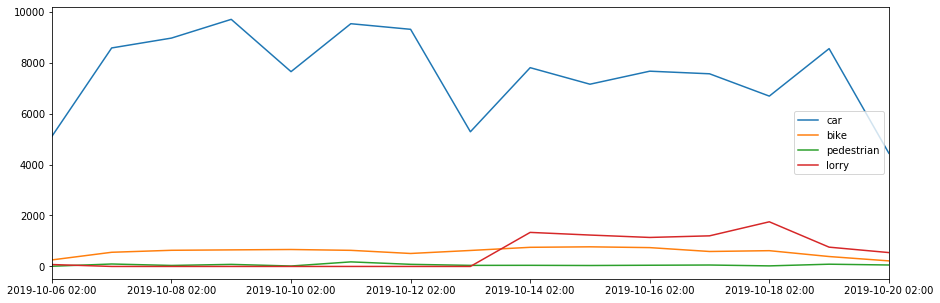

In [24]:
# read segment info from the reports
i = 0
print(LeuvenSegmentCoordinates[LeuvenSegmentCoordinates['SegmentID']==LeuvenSegmentIDs[i]])
url = "https://telraam-api.net/v0/reports/" + str(LeuvenSegmentIDs[i])
day_start = "2019-10-06"
day_end = "2019-10-20"
param = "{\n    \"time_start\": \""+day_start+" 00:01\",\n    \"time_end\": \""+day_end+" 23:59\",\n    \"level\": \"segments\",\n    \"format\": \"per-day\"\n}"
headers = {'Content-Type': 'application/json'}
r = requests.request("POST", url, headers=headers,data = param)
# print(r.json())

# vehicle info data frame
dfsegment = pd.DataFrame()
for i in np.arange(0,len((r.json()['report'][:]))):
    info = r.json()['report'][i]
    print(info)
#     df_info = pd.DataFrame({'car':info['car'],'bike':info['bike']},index=[info['date']])
    df_info = pd.DataFrame({'car':info['car'],'bike':info['bike'],'pedestrian':info['pedestrian'],'lorry':info['lorry']},index=[info['date']])
    dfsegment = pd.concat([dfsegment,df_info],axis=0)

print(dfsegment.head(4))
print('...')
print(dfsegment.tail(4))
dfsegment.plot(figsize=(15,5));

153
...
                   car  bike  pedestrian  lorry
2019-10-06 02:00  5105   256           8     75
2019-10-07 02:00  8574   556          96      0


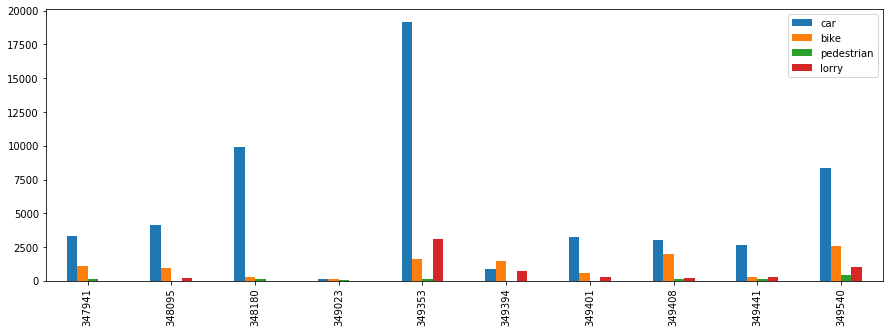

In [16]:
dfAllSegment = pd.DataFrame()
print(len(LeuvenSegmentIDs))
for x in LeuvenSegmentIDs:
    url = "https://telraam-api.net/v0/reports/" + str(x)
    param = "{\n    \"time_start\": \"2019-04-08 00:01\",\n    \"time_end\": \"2019-04-08 23:59\",\n    \"level\": \"segments\",\n    \"format\": \"per-day\"\n}"
    headers = {'Content-Type': 'application/json'}
    r = requests.request("POST", url, headers=headers,data = param)
    
    info = r.json()['report'][:]
    if len(info)!=0:
        info = info[0]
        df_info = pd.DataFrame({'car':info['car'],'bike':info['bike'],'pedestrian':info['pedestrian'],'lorry':info['lorry']},index=[info['segment_id']])
        dfAllSegment = pd.concat([dfAllSegment,df_info],axis=0)

dfAllSegment.head(4)
print('...')
print(dfsegment.tail(4))
dfAllSegment.head(10).plot.bar(figsize=(15,5));

In [17]:
dictLeuvenTrafficInfo = {}
dates_list = [dt.datetime(2019,5,i+1) for i in range(10)]
year_month_day_list = [d.strftime("%y-%m-%d") for d in dates_list]
print(year_month_day_list[0])
# print(dates_list[10].day)

for i in range(len(year_month_day_list)):
    
    dfAllSegment = pd.DataFrame()
    print(len(LeuvenSegmentIDs))
    for x in LeuvenSegmentIDs:
        url = "https://telraam-api.net/v0/reports/" + str(x)
        param = "{\n    \"time_start\": \"20"+year_month_day_list[i]+" 00:01\",\n    \"time_end\": \"20"+year_month_day_list[i]+" 23:59\",\n    \"level\": \"segments\",\n    \"format\": \"per-day\"\n}"
        headers = {'Content-Type': 'application/json'}
        r = requests.request("POST", url, headers=headers,data = param)

        info = r.json()['report'][:]
        if len(info)!=0:
            info = info[0]
            df_info = pd.DataFrame({'car':info['car'],'bike':info['bike'],'pedestrian':info['pedestrian'],'lorry':info['lorry']},index=[info['segment_id']])
            dfAllSegment = pd.concat([dfAllSegment,df_info],axis=0)
        
    dictLeuvenTrafficInfo[year_month_day_list[i]] = dfAllSegment

for key in dictLeuvenTrafficInfo.keys():
    print("\n" +"="*40)
    print(key)
    print("-"*40)
    print(dictLeuvenTrafficInfo[key])

19-05-01
153
153
153
153
153
153
153
153
153
153

19-05-01
----------------------------------------
          car  bike  pedestrian  lorry
347860   5017   284           6    330
347948   3538  1570          48     75
348095   4259   699          33    499
348180   6345   296          60    921
348995    363   226         161      0
349394   1438  2774          16     91
349401   2285   455          15    108
349404    536   477           3    185
349408   1110  1254         146     35
349441    675     0           0      0
349448    261   171          66     46
349535    238   295         159      0
349540   5498  2569         215    580
349541   5146  2196         503    700
349547  13380  2051         402   2671
349547  13380  2051         402   2671
349556   4104  1434         185   1141
349556   4104  1434         185   1141
349557     43    33          36     31
349560   5280  1900         273    570
349570    262   409         270      5
349574   1713   501         102    221
349